In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle

In [2]:
# Create a df with holidays
from workalendar.europe import Belgium
cal = Belgium()

In [3]:
data2 = pd.read_pickle('Building-2-AIBV/building_2_cnsumptions.pkl')
data2.index = pd.to_datetime(data2.index)
#data2['Datetime'] = data2.index
data2

,Valeur
Date,
2014-01-06 02:00:00,3.85
2014-01-06 02:15:00,3.85
2014-01-06 02:30:00,3.50
2014-01-06 02:45:00,3.50
2014-01-06 03:00:00,3.85
...,...
2020-06-30 23:00:00,3.50
2020-06-30 23:15:00,3.50
2020-06-30 23:30:00,3.50


In [4]:
data2['working day'] =  data2.index.to_series().apply(cal.is_working_day)
data2

,Valeur,working day
Date,,
2014-01-06 02:00:00,3.85,True
2014-01-06 02:15:00,3.85,True
2014-01-06 02:30:00,3.50,True
2014-01-06 02:45:00,3.50,True
2014-01-06 03:00:00,3.85,True
...,...,...
2020-06-30 23:00:00,3.50,True
2020-06-30 23:15:00,3.50,True
2020-06-30 23:30:00,3.50,True


In [5]:
data2.info()
data2 = data2[~data2.index.duplicated(keep='last')]
data2 = data2.sort_index()
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213305 entries, 2014-01-06 02:00:00 to 2020-01-07 00:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Valeur       213305 non-null  float64
 1   working day  213305 non-null  bool   
dtypes: bool(1), float64(1)
memory usage: 3.5 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213281 entries, 2014-01-06 02:00:00 to 2020-12-06 23:45:00
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Valeur       213281 non-null  float64
 1   working day  213281 non-null  bool   
dtypes: bool(1), float64(1)
memory usage: 3.5 MB


In [6]:
data2.to_pickle('./building2_holidays.pkl')
data2.tail()

,Valeur,working day
Date,,
2020-12-06 22:45:00,3.85,False
2020-12-06 23:00:00,3.85,False
2020-12-06 23:15:00,3.50,False
2020-12-06 23:30:00,3.85,False
2020-12-06 23:45:00,3.85,False


In [7]:
data2 = data2[:'2019']
data2.tail()

,Valeur,working day
Date,,
2019-12-31 22:45:00,4.55,True
2019-12-31 23:00:00,5.60,True
2019-12-31 23:15:00,5.60,True
2019-12-31 23:30:00,3.85,True
2019-12-31 23:45:00,4.20,True


In [8]:
upsampled = data2.resample('15T').mean()

In [9]:
upsampled['2014-12-06':'2015'].isna().sum() 

Valeur         4
working day    4
dtype: int64

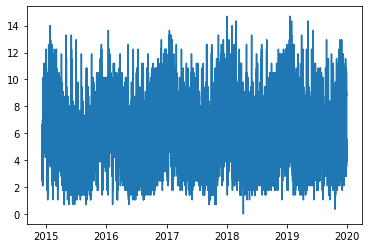

In [10]:
fix, ax = plt.subplots()
ax.plot(upsampled['Valeur']['2014-12-06':])

In [18]:
dataplus = dataplus.drop('working day', axis=1)
dataplus

,Valeur
Date,
2014-12-06 00:00:00,3.85
2014-12-06 00:15:00,4.20
2014-12-06 00:30:00,4.20
2014-12-06 00:45:00,3.50
2014-12-06 01:00:00,4.20
...,...
2019-12-31 22:45:00,4.55
2019-12-31 23:00:00,5.60
2019-12-31 23:15:00,5.60


In [14]:
dataplus = upsampled['2014-12-06':]
dataplus = dataplus.fillna(method='ffill')
dataplus.to_csv('./B2_Consumption_15min.csv')

In [17]:
df = pd.read_csv('./B2_Consumption_15min.csv')
df

,Date,Valeur,working day
0,2014-12-06 00:00:00,3.85,0.0
1,2014-12-06 00:15:00,4.20,0.0
2,2014-12-06 00:30:00,4.20,0.0
3,2014-12-06 00:45:00,3.50,0.0
4,2014-12-06 01:00:00,4.20,0.0
...,...,...,...
177787,2019-12-31 22:45:00,4.55,1.0
177788,2019-12-31 23:00:00,5.60,1.0
177789,2019-12-31 23:15:00,5.60,1.0
177790,2019-12-31 23:30:00,3.85,1.0


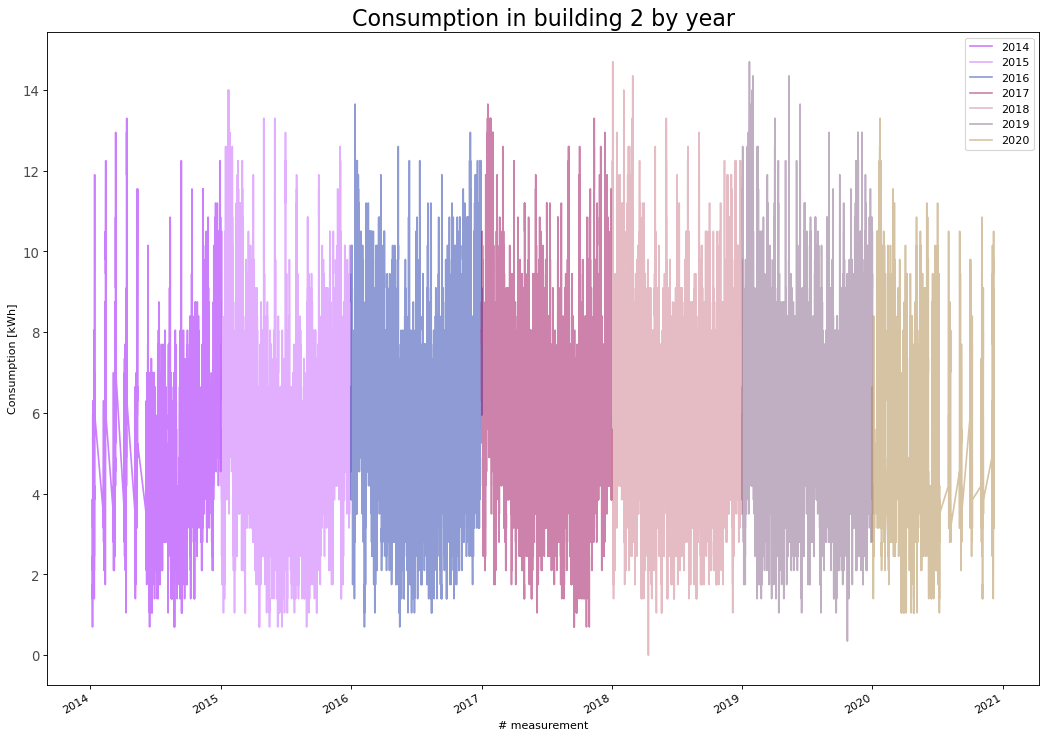

In [21]:
years = data2.index.year.unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False) 

# Draw Plot
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
for i,year in enumerate(years):
        data_temp=data2.loc[data2.index.year==year, :]
        data_temp.plot(y='Valeur', use_index=True, color=mycolors[i], label=year, ax=ax, alpha=0.5)

# Decoration
plt.gca().set(ylabel='Consumption [kWh]', xlabel='# measurement')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Consumption in building 2 by year", fontsize=20)
plt.show()

<AxesSubplot:xlabel='Date'>

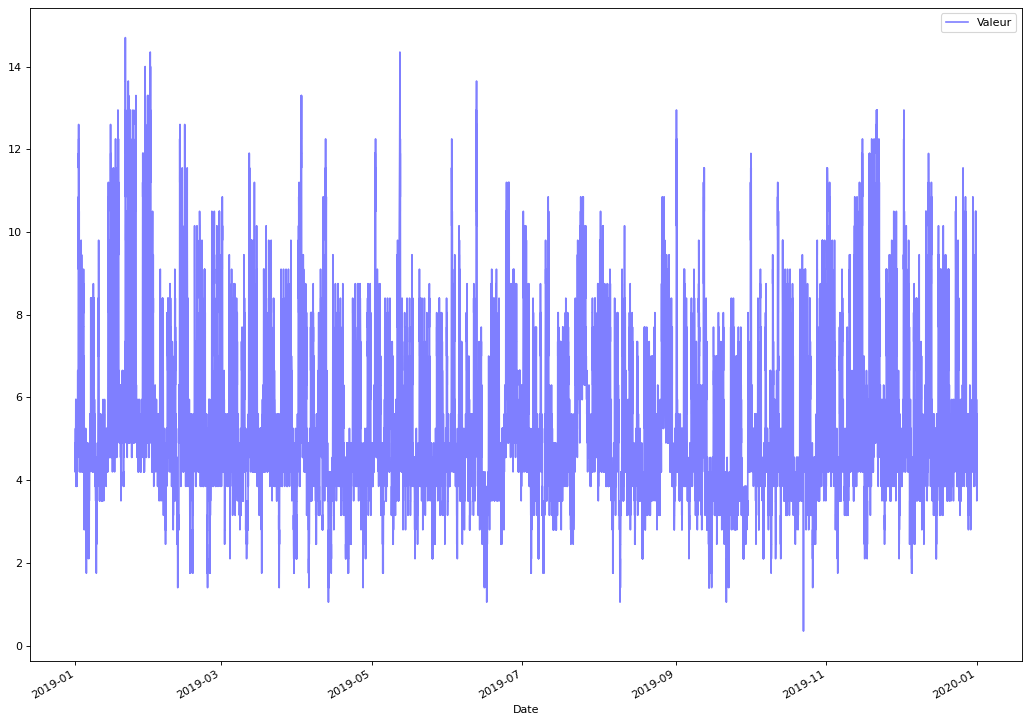

In [22]:
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
data_temp=data2.loc[data2.index.year==2019, :]
data_temp.plot(y='Valeur', use_index=True, color='b', ax=ax, alpha=0.5)
